# Week 6 - Bivariate Analysis, part 2

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from datetime import datetime, timedelta
from google.colab import files

In [2]:
uploaded = files.upload()

Saving NS_UNSW_NB15.csv to NS_UNSW_NB15.csv


In [4]:
df = pd.read_csv("NS_UNSW_NB15.csv")

pd.set_option('display.max_columns', None)
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [5]:
# Attack Types: Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode, Worms

In [22]:
import pandas as pd

descriptions = pd.DataFrame({
    'dur' : ['Record total duration'],
    'proto' : ['Transaction protocol'],
    'service' : ['http, ftp, smtp, ssh, dns, ftp-data ,irc and (-) if not much used service'],
    'state' : ['Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR,...'],
    'spkts' : ['Source to destination packet count'],
    'dpkts' : ['Destination to source packet count'],
    'sbytes' : ['Source to destination transaction bytes'],
    'dbytes' : ['Destination to source transaction bytes'],
    'sttl' : ['Source to destination time to live value'],
    'dttl' : ['Destination to source time to live value'],
    'sload' : ['Source bits per second'],
    'dload' : ['Destination bits per second'],
    'sloss' : ['Source packets retransmitted or dropped'],
    'dloss' : ['Destination packets retransmitted or dropped'],
    'sinpkt' : ['Source interpacket arrival time (mSec)'],
    'dinpkt' : ['Destination interpacket arrival time (mSec)'],
    'sjit' : ['Source jitter (mSec)'],
    'djit' : ['Destination jitter (mSec)'],
    'swin' : ['Source TCP window advertisement value'],
    'dtcpb' : ['Destination TCP base sequence number'],
    'dwin' : ['Destination TCP window advertisement value'],
    'tcprtt' : ['TCP connection setup round-trip time, the sum of synack and ackdat.'],
    'synack' : ['TCP connection setup time, the time between the SYN and the SYN_ACK packets.'],
    'ackdat' : ['TCP connection setup time, the time between the SYN_ACK and the ACK packets.'],
    'smean' : ['Mean of the flow packet size transmitted by the src'],
    'dmean' : ['Mean of the flow packet size transmitted by the dst'],
    'trans_depth' : ['Represents the pipelined depth into the connection of http request/response transaction'],
    'response_body_len' : ['Actual uncompressed content size of the data transferred from the server’s http service.'],
    'ct_srv_src' : ['No. of connections that contain the same service and source address in 100 connections.'],
    'ct_state_ttl' : ['No. for each state according to TTL values in 100 connections.'],
    'ct_dst_ltm' : ['No. of connections of the same destination address in 100 recent connections.'],
    'ct_src_dport_ltm' : ['No. of connections of the same source and destination port in 100 connections.'],
    'ct_dst_sport_ltm' : ['No. of connections of the same destination and source port in 100 connections.'],
    'ct_dst_src_ltm' : ['No. of connections of the same source and destination address in 100 connections.'],
    'is_ftp_login' : ['1 if ftp session is accessed by user and password, else 0.'],
    'ct_ftp_cmd' : ['No of flows with an ftp command.'],
    'ct_flw_http_mthd' : ['No. of flows with HTTP methods like GET or POST.'],
    'ct_src_ltm' : ['No. of connections of the same source address in 100 recent connections.'],
    'ct_srv_dst' : ['No. of connections with the same service and destination address in 100 connections.'],
    'is_sm_ips_ports' : ['1 if source and destination IPs and ports are equal, else 0.'],
    'attack_cat' : ['Name of attack category (e.g., Fuzzers, Backdoor, etc.)'],
    'label' : ['0 for normal, 1 for attack records']
}, index=['Description']).T

descriptions


,Description
dur,Record total duration
proto,Transaction protocol
service,"http, ftp, smtp, ssh, dns, ftp-data ,irc and (..."
state,Indicates to the state and its dependent proto...
spkts,Source to destination packet count
dpkts,Destination to source packet count
sbytes,Source to destination transaction bytes
dbytes,Destination to source transaction bytes
sttl,Source to destination time to live value
dttl,Destination to source time to live value


In [7]:
df['attack_cat'].value_counts()

,count
attack_cat,
Normal,37000
Generic,18871
Exploits,11132
Fuzzers,6062
DoS,4089
Reconnaissance,3496
Analysis,677
Backdoor,583
Shellcode,378


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [9]:
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,4.753692,6.308556,755.394301,121.701284,6.363075e+03,535.180430,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1.595372e+03,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,64.649620,55.708021,6182.615732,1292.378499,5.672402e+04,3635.305383,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,3.806697e+04,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557929,0.010000,1.762392e+01,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3.219332e+03,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052596,0.048816,100.000000,87.000000,0.000000,0.000000e+00,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,60009.992000,57739.240000,1.483831e+06,463199.240100,255.00000,4.294950e+09,4.294881e+09,255.00000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5.242880e+06,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


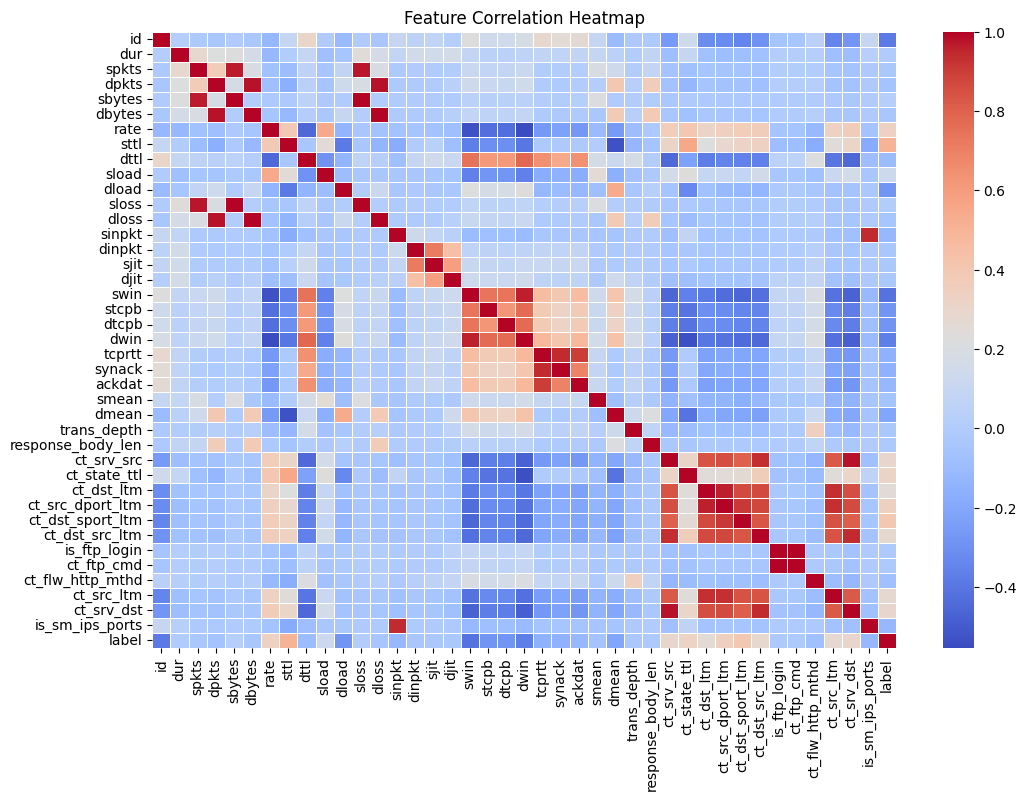

In [10]:
num_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
matrix = num_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Set title
plt.title("Feature Correlation Heatmap")

# Show the plot
plt.show()

In [11]:
# Filter out correlations with 0.4+

corr_pairs = matrix.where((abs(matrix) >= 0.6) & (abs(matrix) < 0.9000))

corr_pairs = corr_pairs.stack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Sort by absolute correlation value
corr_pairs = corr_pairs.sort_values(by="Correlation", ascending=False)

corr_pairs

,Feature 1,Feature 2,Correlation
23,tcprtt,ackdat,0.897688
26,ackdat,tcprtt,0.897688
37,ct_src_dport_ltm,ct_dst_src_ltm,0.876030
45,ct_dst_src_ltm,ct_src_dport_ltm,0.876030
33,ct_dst_ltm,ct_dst_sport_ltm,0.872185
40,ct_dst_sport_ltm,ct_dst_ltm,0.872185
44,ct_dst_src_ltm,ct_dst_ltm,0.868150
34,ct_dst_ltm,ct_dst_src_ltm,0.868150
38,ct_src_dport_ltm,ct_srv_dst,0.863614
53,ct_srv_dst,ct_src_dport_ltm,0.863614


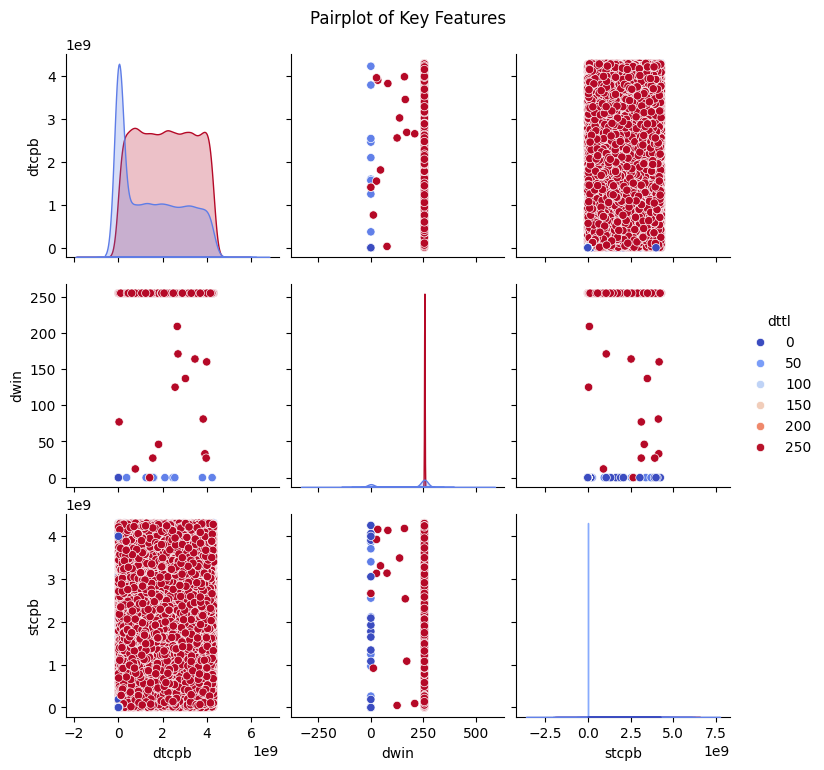

In [12]:
# dtcpb': 'Destination TCP base sequence number',
# 'dwin': 'Destination TCP window advertisement value'

features = df[['dtcpb', 'dwin', 'dttl', 'stcpb']]

sns.pairplot(features,hue='dttl', diag_kind='kde', palette="coolwarm")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

In [13]:
#  'spkts': 'Source to destination packet count'
#  'dpkts': 'Destination to source packet count'

#  'sbytes': 'Source to destination transaction bytes'
#  'dbytes': 'Destination to source transaction bytes'

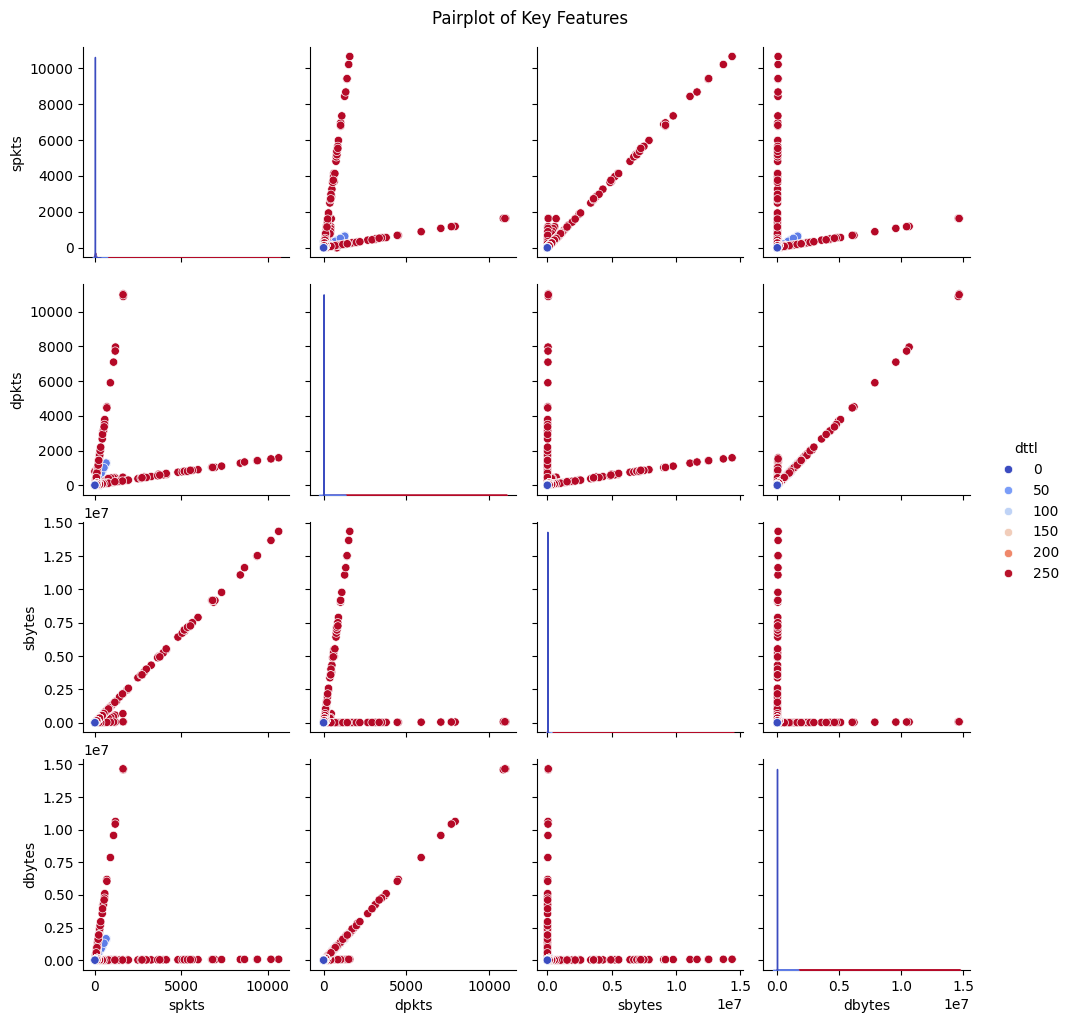

In [14]:
ft = df[['spkts', 'dpkts', 'sbytes', 'dbytes', 'dttl']]  # Include 'dttl' for hue

sns.pairplot(ft, hue='dttl', diag_kind='kde', palette="coolwarm")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

In [15]:
#  'sttl': 'Source to destination time to live value'
#  'dttl': 'Destination to source time to live value'

#  'sload': 'Source bits per second'
#  'dload': 'Destination bits per second'

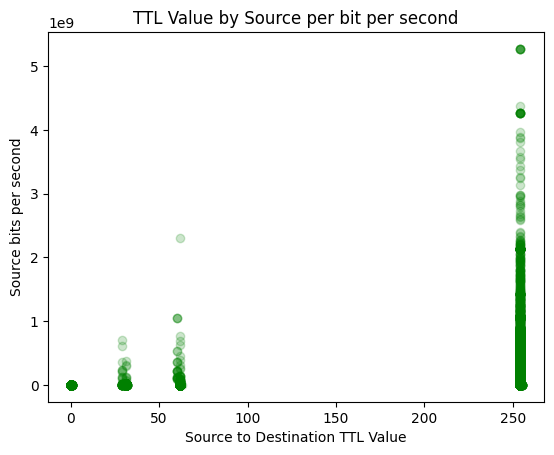

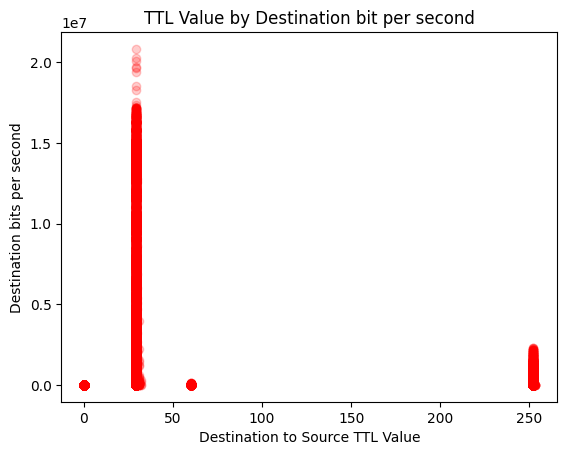

In [16]:
# Source to destination TTL value vs. Source bits per second

plt.scatter(df['sttl'], df['sload'], color='green', alpha=0.2)
plt.xlabel("Source to Destination TTL Value")
plt.ylabel("Source bits per second")
plt.title("TTL Value by Source per bit per second")
plt.show()

plt.scatter(df['dttl'], df['dload'], color='red', alpha=0.2)
plt.xlabel("Destination to Source TTL Value")
plt.ylabel("Destination bits per second")
plt.title("TTL Value by Destination bit per second")
plt.show()

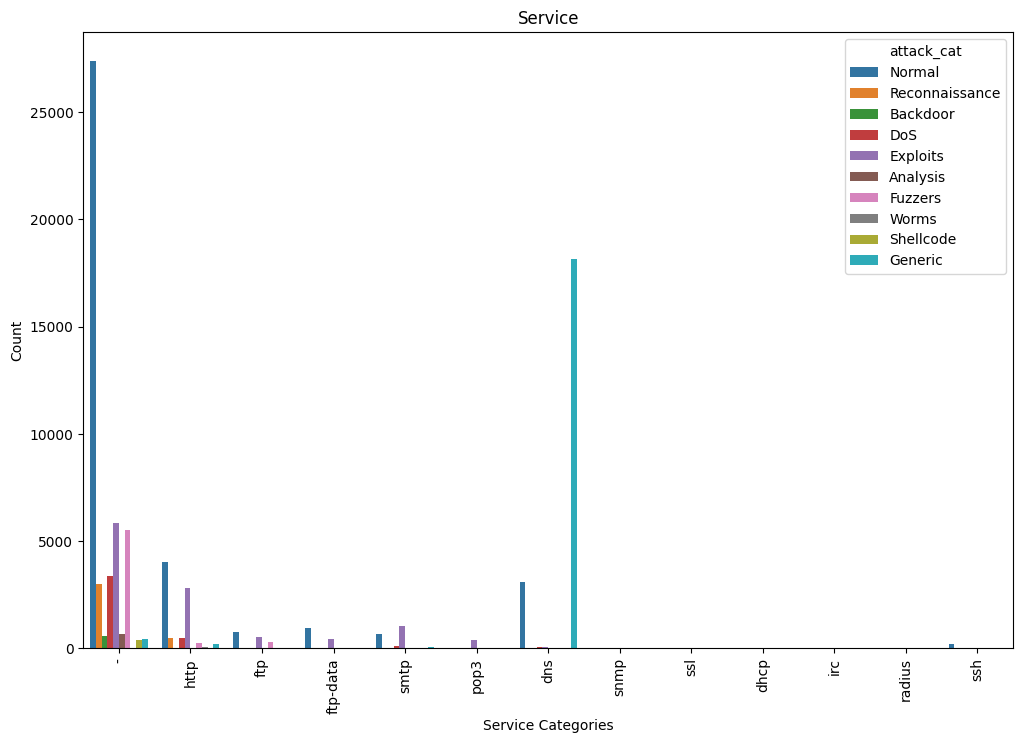

In [17]:
# Histograms

# attack_cat and service or protocol

plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='service', hue='attack_cat')
plt.xlabel('Service Categories')
plt.ylabel('Count')
plt.title('Service')
plt.xticks(rotation=90)  # Rotate labels if there are many categories
plt.show()

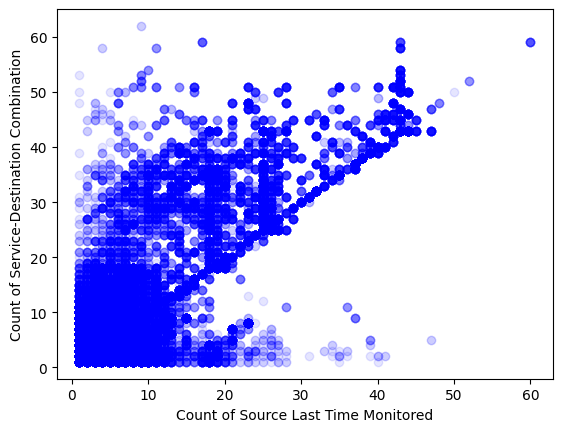

High ct_src_ltm (Count of Source Last Time Monitored) suggests a Source IP is making too many requests -- potentially an attack.
High ct_srv_dst (Count of Service-Destination Combination) suggests a single destination may be under attack or experiencing unusual service requests.


In [18]:

plt.scatter(df['ct_src_ltm'], df['ct_srv_dst'], color='blue', alpha=0.1)
plt.xlabel("Count of Source Last Time Monitored")
plt.ylabel("Count of Service-Destination Combination")
plt.show()

print('High ct_src_ltm (Count of Source Last Time Monitored) suggests a Source IP is making too many requests -- potentially an attack.')
print('High ct_srv_dst (Count of Service-Destination Combination) suggests a single destination may be under attack or experiencing unusual service requests.')


Text(0, 0.5, 'Source to destination transaction bytes')

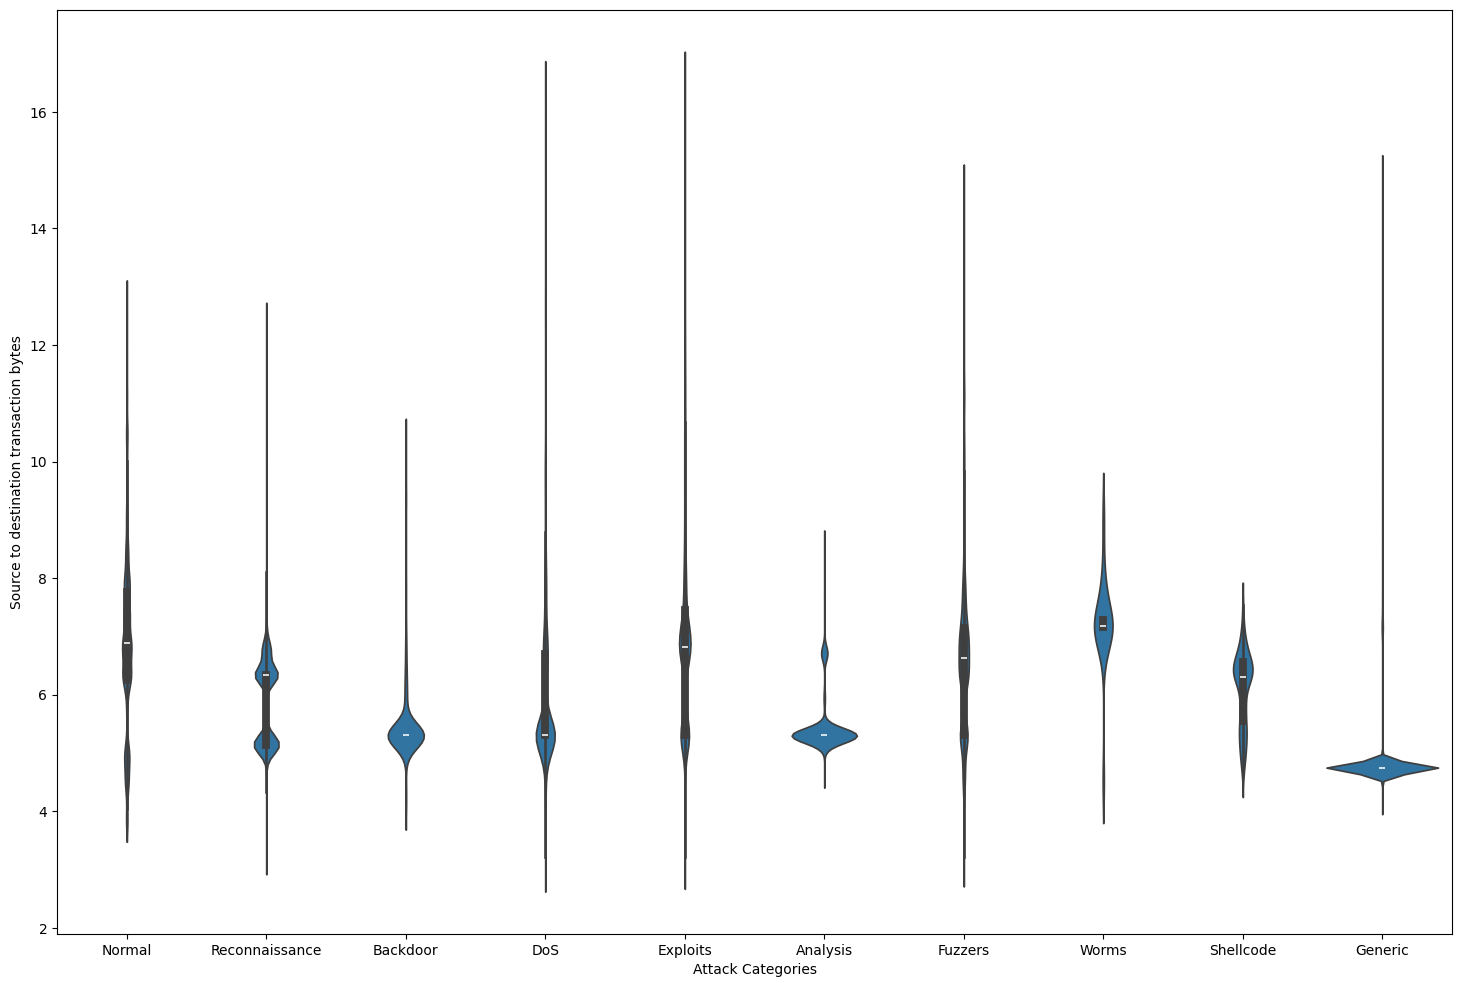

In [19]:
# Violing Plot

plt.figure(figsize=(18,12))
df['sbytes_log'] = np.log1p(df['sbytes'])  # log1p to handle zeros
sns.violinplot(x='attack_cat', y='sbytes_log', data=df)
plt.xlabel('Attack Categories')
plt.ylabel('Source to destination transaction bytes')


Text(0, 0.5, 'Source to destination transaction bytes')

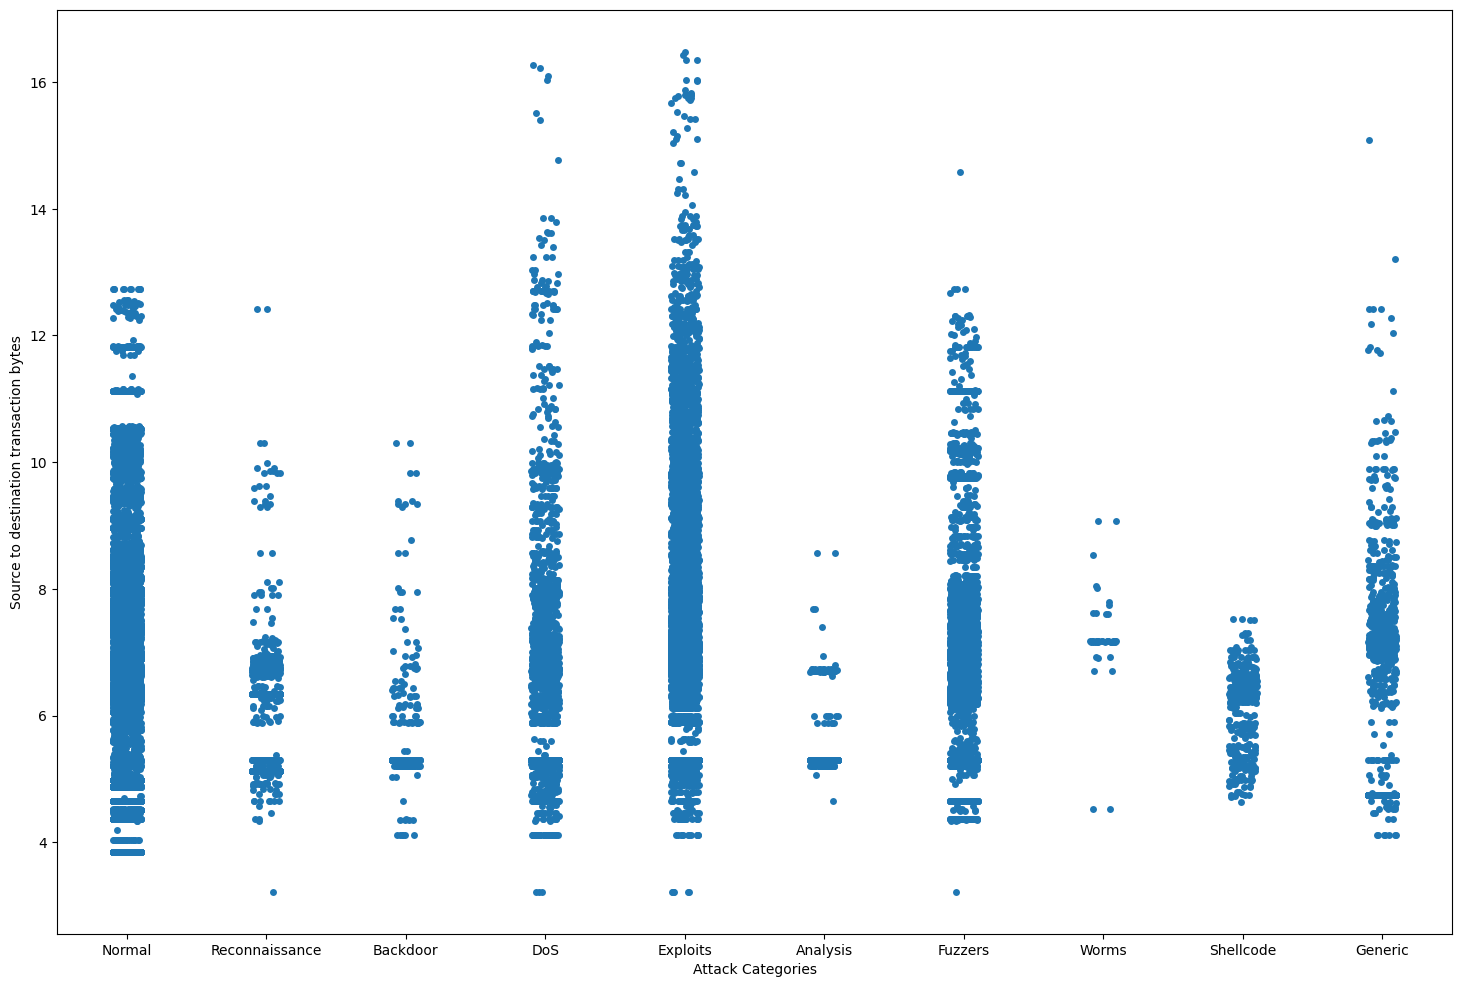

In [20]:
# Violing Plot

plt.figure(figsize=(18,12))
df['sbytes_log'] = np.log1p(df['sbytes'])  # log1p to handle zeros
sns.stripplot(x='attack_cat', y='sbytes_log', data=df)
plt.xlabel('Attack Categories')
plt.ylabel('Source to destination transaction bytes')
